In [1]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#report
import sweetviz as sv

from sklearn.preprocessing import KBinsDiscretizer




In [2]:
df = pd.read_csv("../data/01_raw/bank-additional-full.csv", sep=";")

<hr>

- Some methods applied here are inspired by the book: "Machine Learning Engineering" by Andriy Burkov

# Age:

In [3]:
df["age"].value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [4]:
fig = ff.create_distplot([df["age"]], group_labels=["Age"], bin_size=2, show_hist=True, show_curve=True)
fig.update_layout(title="Age Distribution with KDE Trend Line")
fig.show()

### Possibility 1: Uniform

In [5]:
# Uniform binning: 4 bins
kbd_uniform = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df["age_bin_uniform"] = kbd_uniform.fit_transform(df[["age"]])

#### Possibility 2: KMEANS

In [6]:
kbd_kmeans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
df["age_bin_kmeans"] = kbd_kmeans.fit_transform(df[["age"]])


#### Possibility 3: Quantile

In [7]:
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df["age_bin_quantile"] = kbd.fit_transform(df[["age"]])


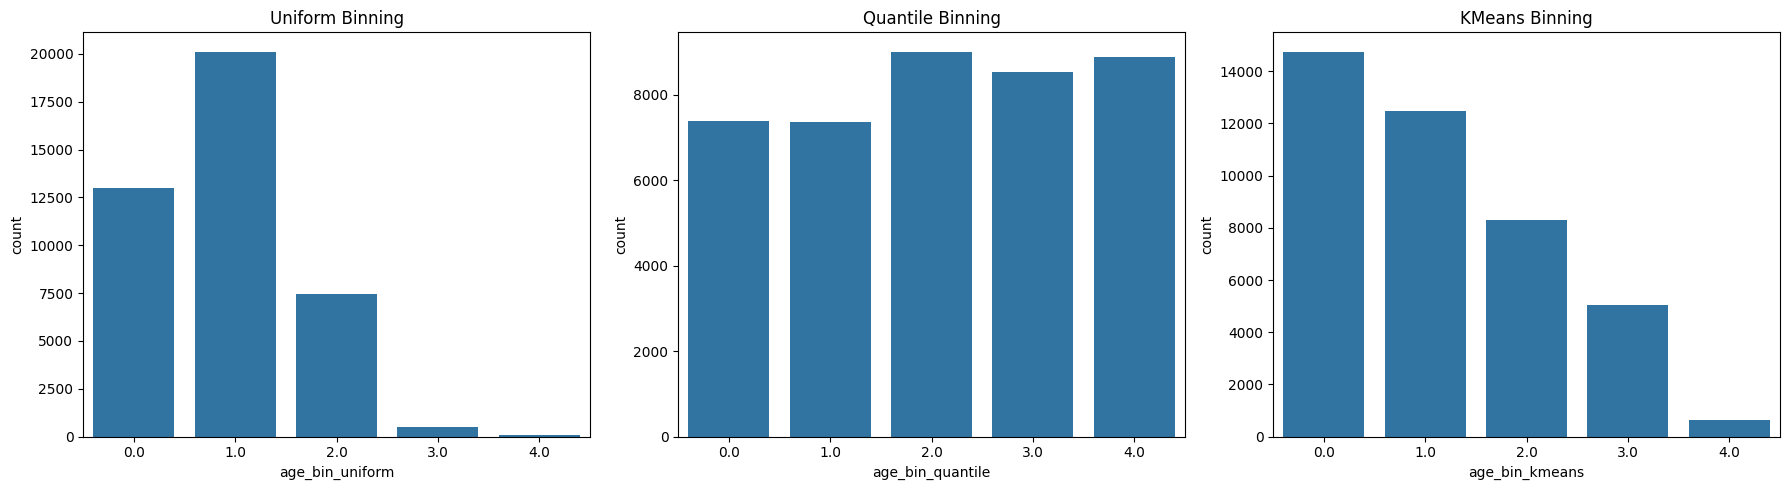

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Uniform
sns.countplot(x="age_bin_uniform", data=df, ax=axes[0])
axes[0].set_title("Uniform Binning")

# Quantile
sns.countplot(x="age_bin_quantile", data=df, ax=axes[1])
axes[1].set_title("Quantile Binning")

# KMeans
sns.countplot(x="age_bin_kmeans", data=df, ax=axes[2])
axes[2].set_title("KMeans Binning")

plt.tight_layout()
plt.show()

<hr>
<hr>

# Campaign

- Very high skewness, binning could be interesting.

In [9]:
df["campaign"].value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [10]:
def bin(df, column):
    df[column + "_bin"] = df[column].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3 if x == 3 else 4 if x == 4 else 5 if x ==5 else 6)
    return df
df = bin(df, "campaign")

In [11]:
df["campaign_bin"].value_counts()

campaign_bin
1    17642
2    10570
3     5341
6     3385
4     2651
5     1599
Name: count, dtype: int64

# Consumer Price Index

In [12]:
mean_cpi = df["cons.price.idx"].mean()
mean_cpi

93.57566436826262

In [13]:
top_cpi = df["cons.price.idx"].value_counts().nlargest(3).index.tolist()
df["cpi_top_value"] = df["cons.price.idx"].apply(lambda x: x if x in top_cpi else "other")


In [14]:
df["cpi_top_value"].value_counts()

cpi_top_value
other     20946
93.994     7763
93.918     6685
92.893     5794
Name: count, dtype: int64

In [15]:
q75 = df["cons.price.idx"].quantile(0.75)
df["cpi_above_75th"] = (df["cons.price.idx"] > q75).astype(int)
df["cpi_above_75th"].value_counts()

cpi_above_75th
0    35406
1     5782
Name: count, dtype: int64

<h>

# Consumer  Conf idx

In [16]:
mean = df["cons.conf.idx"].mean()
df["cci_top_value"] = df["cons.conf.idx"].apply(lambda x: x if x > mean else "below_mean")
df["cci_top_value"].value_counts()


cci_top_value
 below_mean    24266
-36.4           7763
-36.1           5175
-31.4            770
-26.9            447
-30.1            357
-40.3            311
-37.5            303
-29.8            267
-34.8            264
-38.3            233
-39.8            229
-40.0            212
-33.6            178
-34.6            174
-33.0            172
-40.4             67
Name: count, dtype: int64

In [17]:
q75 = df["cons.conf.idx"].quantile(0.75)
df["cci_above_75th"] = (df["cons.conf.idx"] > q75).astype(int)

In [18]:
df["cci_above_75th"].value_counts()

cci_above_75th
0    33384
1     7804
Name: count, dtype: int64

<hr>

# EURibor 3M

In [19]:
df["euribor_bin"] = pd.qcut(df["euribor3m"], q=4, labels=["very_low", "low", "high", "very_high"])

In [20]:
df["euribor_bin"].value_counts()

euribor_bin
low          11512
very_low     10543
very_high     9791
high          9342
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               41188 non-null  int64   
 1   job               41188 non-null  object  
 2   marital           41188 non-null  object  
 3   education         41188 non-null  object  
 4   default           41188 non-null  object  
 5   housing           41188 non-null  object  
 6   loan              41188 non-null  object  
 7   contact           41188 non-null  object  
 8   month             41188 non-null  object  
 9   day_of_week       41188 non-null  object  
 10  duration          41188 non-null  int64   
 11  campaign          41188 non-null  int64   
 12  pdays             41188 non-null  int64   
 13  previous          41188 non-null  int64   
 14  poutcome          41188 non-null  object  
 15  emp.var.rate      41188 non-null  float64 
 16  cons.price.idx    4118

In [22]:
df["euribor_bin"].dtypes

CategoricalDtype(categories=['very_low', 'low', 'high', 'very_high'], ordered=True, categories_dtype=object)

<hr>

# Default

In [30]:
df["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

## NEW FEATURES

# age and housing interaction

In [32]:
df["age"]

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [35]:
df["young_housing_loan"] = ((df["age"] <= 25) & (df["housing"] == "yes")).astype(int)
df["middle_aged_housing_loan"] = ((df["age"] > 25) & (df["age"] <= 50) & (df["housing"] == "yes")).astype(int)
df["senior_housing_loan"] = ((df["age"] > 50) & (df["housing"] == "yes")).astype(int)

In [37]:
for col in ["young_housing_loan", "middle_aged_housing_loan", "senior_housing_loan"]:
    print(f"{col} mean:")
    print(df[col].mean())
    print()

young_housing_loan mean:
0.021511119743614644

middle_aged_housing_loan mean:
0.41038652034573175

senior_housing_loan mean:
0.09194425560842964



In [38]:
for col in ["young_housing_loan", "middle_aged_housing_loan", "senior_housing_loan"]:
    print(f"{col} value counts:")
    print(df[col].value_counts())
    print("\n")

young_housing_loan value counts:
young_housing_loan
0    40302
1      886
Name: count, dtype: int64


middle_aged_housing_loan value counts:
middle_aged_housing_loan
0    24285
1    16903
Name: count, dtype: int64


senior_housing_loan value counts:
senior_housing_loan
0    37401
1     3787
Name: count, dtype: int64




<hr>

# binary feature Contacted Before

In [40]:
df["pdays"].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [42]:
df["contacted_before"] = df["pdays"].apply(lambda x: 1 if x == 999 else 0)
df["contacted_before"].value_counts()

contacted_before
1    39673
0     1515
Name: count, dtype: int64

<hr>

# Employment Rate

In [44]:
df["emp.var.rate"].value_counts()

emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

In [45]:
df["nr.employed"].value_counts()

nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

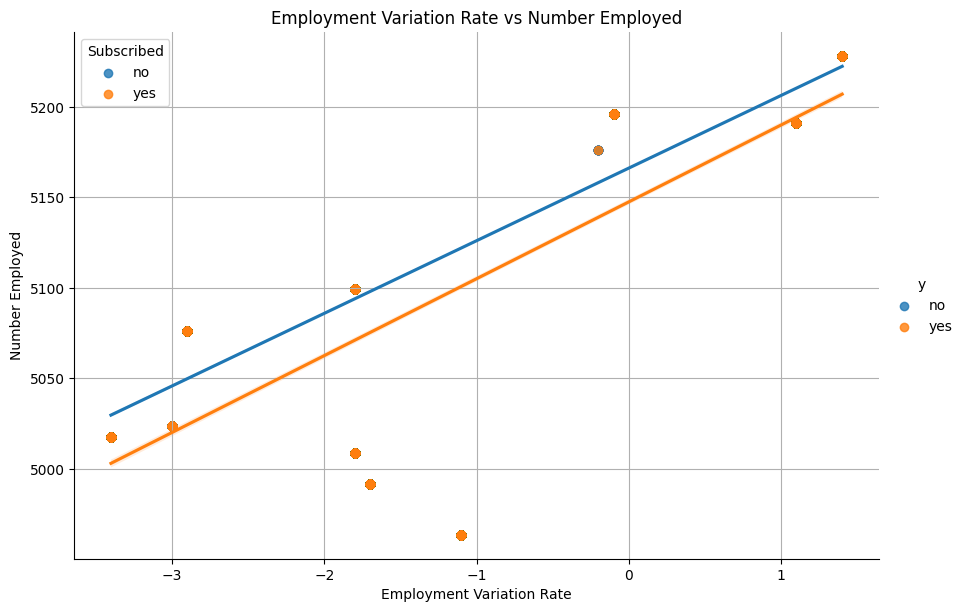

In [48]:
plt.figure(figsize=(10, 6))

sns.lmplot(data=df, x="emp.var.rate", y="nr.employed", hue="y", height=6, aspect=1.5)

plt.title("Employment Variation Rate vs Number Employed")
plt.xlabel("Employment Variation Rate")
plt.ylabel("Number Employed")
plt.grid(True)
plt.legend(title="Subscribed")
plt.show()

In [50]:
df["emp_rate_x_employed"] = df["emp.var.rate"] * df["nr.employed"]
df["emp_rate_x_employed"].value_counts()

emp_rate_x_employed
 7319.34     16234
-9178.38      8534
 5710.10      7763
-519.58       3683
-14720.98     1663
-17059.50     1071
-8485.72       773
-9015.66       650
-5459.96       635
-15070.50      172
-1035.26        10
Name: count, dtype: int64

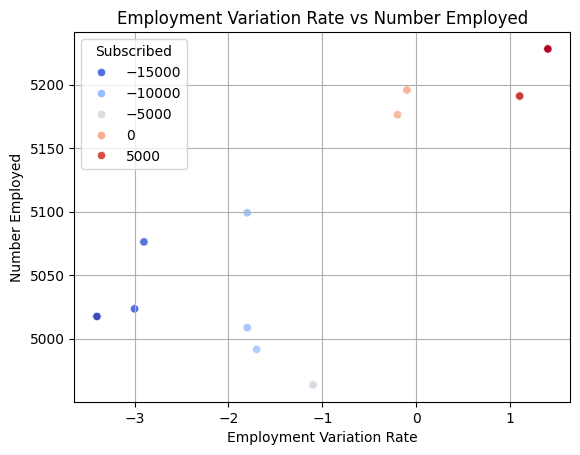

In [51]:
sns.scatterplot(data=df, x="emp.var.rate", y="nr.employed", hue="emp_rate_x_employed", palette="coolwarm")
plt.title("Employment Variation Rate vs Number Employed")
plt.xlabel("Employment Variation Rate")
plt.ylabel("Number Employed")
plt.grid(True)
plt.legend(title="Subscribed")
plt.show()


<hr>